<a href="https://colab.research.google.com/github/CanecaDX/Deep_Learning_2025/blob/main/diabetes_ClassificationMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course: Deep Learning
# Author: Sandro Camargo <sandrocamargo@unipampa.edu.br>
# Classification with Multi Layer Perceptron Example Urban Land Cover
# Dataset: https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover

To open this code in your Google Colab environment, [click here](https://colab.research.google.com/github/Sandrocamargo/deep-learning/blob/master/dl_class04_ClassificationMLP.ipynb).

A Python library is a collection of related functions. A library contains bundles of encapsulated code which can be used repeatedly in different programs.

In [4]:
# Import Libraries
import keras # Neural Network Library
from keras import layers # Layers to a neural network
from keras import optimizers # optimizers
import pandas as pd # Data Manipulation library
import numpy as np # Fast Numeric Computing library
import tensorflow as tf # Optimizers
import matplotlib.pyplot as plt # Plot library
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.utils import plot_model # Print the network

In [1]:
import urllib.request
urllib.request.urlretrieve("https://www.kaggle.com/api/v1/datasets/download/alexteboul/diabetes-health-indicators-dataset", "diabetes.zip")

('diabetes.zip', <http.client.HTTPMessage at 0x78f29834ca70>)

In [2]:
import zipfile
with zipfile.ZipFile("diabetes.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [8]:
# Loading training dataset
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv', delimiter=",", header=0)
# About the parameters
# Header=1: column names (day, month, year, ...) are in the line 1 of this CSV file.
# skiprows=[124,125,126,170]: this lines, which not contains valid data, are not imported. If this parameter is missing, all lines are imported.
# usecols=list(range(0,13)): The last column, which is named Classes, is not imported. If this parameter is missing, all columns are imported.

# inspecting columns and data types from "data" dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
datatest = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv', delimiter=",", header=0)
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
classes = data.iloc[:,0]
data.drop(data.columns[[0]], axis=1, inplace=True)
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
data = pd.DataFrame(scaler.transform(data))

MinMaxScaler()


In [10]:
classestest = datatest.iloc[:,0]
datatest.drop(datatest.columns[[0]], axis=1, inplace=True)
scalertest = MinMaxScaler()
print(scalertest.fit(datatest))
MinMaxScaler()
datatest = pd.DataFrame(scaler.transform(datatest))

MinMaxScaler()


The dataset must be randomly splitted in two parts: training set and testing set. The main approaches to split are holdout and n-fold cross validation.
*   Training set is used for building (training) the model.
*   Testing set is used for testing the generalization ability of the model built.

Moreover, inputs($x$) and outputs($y$) must be splitted in each set.




In [19]:
# Creating the training dataset
train_x = data
train_y = label_binarize(classes, classes=[0.0, 1.0, 2.0])
# Creating the testing dataset
test_x = datatest
test_y = label_binarize(classestest, classes=[0.0, 1.0, 2.0])

# Verifying dataset dimensions
print('The training dataset (inputs) dimensions are: ', train_x.shape)
print('The training dataset (outputs) dimensions are: ', train_y.shape)
print('The testing dataset (inputs) dimensions are: ', test_x.shape)
print('The testing dataset (outputs) dimensions are: ', test_y.shape)

The training dataset (inputs) dimensions are:  (253680, 21)
The training dataset (outputs) dimensions are:  (253680, 3)
The testing dataset (inputs) dimensions are:  (253680, 21)
The testing dataset (outputs) dimensions are:  (253680, 3)


After creating the datasets, the next step is defining the architecture of our model.

It must be defined:


*   Architecture: in terms of neurons and layers
*   Optimizer: is the algorithm or method used to change the weights in order to minimize the loss function.

The last step is compiling the model. In this step the loss function, the optimizer and the evaluation metrics must be defined.

In [12]:
# Function to define model architecture
def build_model():
  # Defining the architecture
  # Sequential = Feedforward Neural Network
  # 1 single neuron
  # input_shape is the amount of columns from training set
  model = keras.Sequential([
        layers.Input(shape=[len(train_x.columns)]),
        layers.Dense(2, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(2, activation="softmax")
  ])

  # Defining the optimizer
  optimizer = tf.keras.optimizers.RMSprop(
      learning_rate = 0.001)

  # Mean Squared Error (MSE) is the default loss function in regression models
  model.compile(loss = 'categorical_crossentropy',
      optimizer = optimizer,
      metrics = ['categorical_crossentropy','accuracy'])

  return model

Just for curiosity, you should observe how many parameters ($\theta$) your model has.
At this point, your model is built.

In [13]:
model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

After creating the model, it must be trained (fitted).
Training is done using training set and the amount of epochs must be defined.

In [14]:
EPOCHS = 50

history = model.fit(
    train_x, train_y, epochs = EPOCHS, verbose = 1
)

Epoch 1/50
7928/7928 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9988 - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00
Epoch 2/50
7928/7928 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8055 - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50
7928/7928 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4997 - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4/50
7928/7928 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4997 - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
7928/7928 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.4997 - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00
Epoch 6/50
7928/7928 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.4997 - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
7928/7928 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4997 - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00
Epoch 8/50
7928/7928 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4997 - 

This plot should be generated just to inspect the learning convergence.
It is expected a decreasing of the loss function value through the epochs.


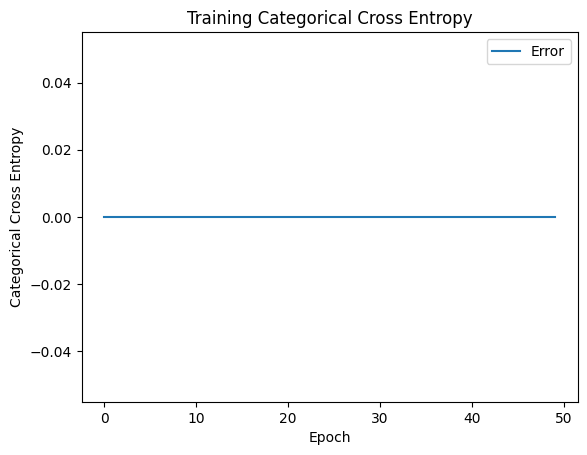

In [15]:
plt.plot(history.history['categorical_crossentropy'])
plt.title('Training Categorical Cross Entropy')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Error'], loc='upper right')
plt.savefig("mlp-class-lossfunction.png")
plt.show()

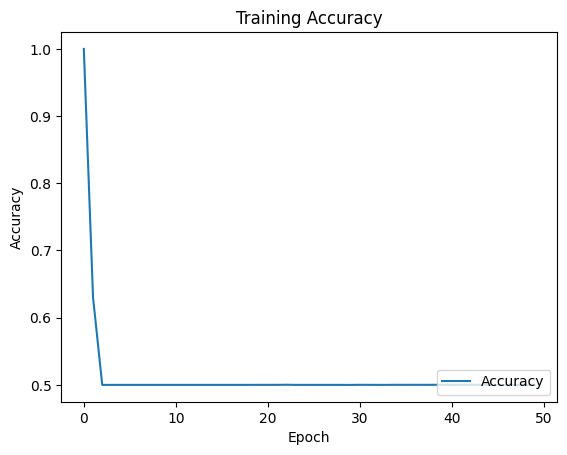

In [16]:
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='lower right')
plt.savefig("mlp-class-trainingaccuracy.png")
plt.show()

In [17]:
weights = model.get_weights() # return a numpy list of weights
print(type(weights))
print(weights)

<class 'list'>
[array([[-4.6066350e-01,  3.8776520e+02],
       [-4.7919545e-02,  3.8798422e+02],
       [ 3.7532949e-03,  3.9673233e+02],
       [-6.6869956e-01,  3.9589380e+02],
       [-2.8802112e-01,  3.8908334e+02],
       [ 2.9885817e-02,  2.9644904e+02],
       [-4.5854187e-01,  3.4557486e+02],
       [ 1.8180133e-01,  3.9474905e+02],
       [ 1.0239612e-01,  3.9264810e+02],
       [ 7.7208035e-02,  3.9510233e+02],
       [-4.3910903e-01,  3.1741931e+02],
       [-2.2532839e-01,  3.9544815e+02],
       [ 2.3371188e-01,  3.3994760e+02],
       [-4.1027513e-01,  3.9370581e+02],
       [ 7.2697222e-02,  3.6567346e+02],
       [ 5.0929509e-02,  3.7181512e+02],
       [-2.1215671e-01,  3.6773911e+02],
       [-5.7467139e-01,  3.8821121e+02],
       [-4.8128679e-01,  3.9512640e+02],
       [-4.2738238e-01,  3.9610867e+02],
       [-1.3536969e-01,  3.9541422e+02]], dtype=float32), array([-2.9405448e-01,  3.9836160e+02], dtype=float32), array([[-2.4949469e-01, -4.5740297e-01,  2.2165518

After the training process, the knowledge learnt by a neural network is stored in its weights.

After the training process, the model should be tested in order to measure its quality, it means, how good are its predictions. The model must be evaluated using the testing set, which is composed by samples that are not in the training set. In regression problems, the correlation coefficient is the default metric to measure the model quality.
The correlation coefficient is computed using real outputs ($y$) and predicted outputs ($\hat{y}$). Correlation coefficient can vary between 0 (bad predictions) and 1 (perfect predictions).

In [18]:
test_predictions = model.predict(test_x) # predict randon activities with the built linear regression model
print(confusion_matrix(test_predictions.argmax(axis=1), test_y.argmax(axis=1)))
print(classification_report(test_predictions.argmax(axis=1), test_y.argmax(axis=1), target_names=['0', '1', '2']))
print('The accuracy on the test set is equal to: %.4f ' % accuracy_score(test_predictions.argmax(axis=1), test_y.argmax(axis=1)))

7928/7928 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
[[253680]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: Number of classes, 1, does not match size of target_names, 9. Try specifying the labels parameter

In [ ]:
cm = confusion_matrix(test_predictions.argmax(axis=1), test_y.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2'])
disp.plot(cmap="bwr")
plt.title('Confusion Matrix for Testing Set')
plt.savefig("mlp-class-confusionmatrix.png")
plt.show()

In [ ]:
train_predictions = model.predict(train_x)
print(confusion_matrix(train_predictions.argmax(axis=1), train_y.argmax(axis=1)))
print(classification_report(train_predictions.argmax(axis=1), train_y.argmax(axis=1), target_names=['0', '1', '2']))
print('The accuracy on the training set is equal to: %.4f ' % accuracy_score(train_predictions.argmax(axis=1), train_y.argmax(axis=1)))

In [ ]:
# Save the model architecture as an image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)